In [1]:
#Import initial dependencies

import pandas as pd
import pyodbc 

#Establish connection to SQL database

conn = pyodbc.connect('Driver={ODBC Driver 17 for SQL Server};'
                      'Server=tcp:group1-owner-nu.database.windows.net,1433;'
                      'Database=final-project;'
                      'Persist Security Info=False;'
                      'Uid=GROUPDB1NU;'
                      'Pwd=NU02282021!;'
                      'MultipleActiveResultSets=False;'
                      'Encrypt=Yes;'
                      'TrustServerCertificate=No;'
                      'Connection Timeout=30;')


cursor = conn.cursor()

#Read tables from SQL

vintage_df = pd.read_sql("SELECT * FROM dbo.vintage", conn)
wine_df = pd.read_sql("SELECT * FROM dbo.wine", conn)



In [2]:
#Merge tables on primary key FullName column

full_table = pd.merge(vintage_df, wine_df, on='FullName', how='inner')
full_table.head()

,FullName,Winery_x,WineName_x,Year_x,Region_x,RegionalVariety_x,VintageRating,VintageRatingCount,VintagePrice,VintageRatingPriceRatio,Age,Winery_y,WineName_y,Year_y,Region_y,RegionalVariety_y,WineRating,WineRatingCount,WinePrice,WineRatingPriceRatio
0,A. Christmann Idig GG 2012,A. Christmann,Idig GG,2012,German,Riesling,4.3,106,83.95,0.051221,9,A. Christmann,Idig GG,2012,German,Riesling,4.3,869,83.95,0.051221
1,A. Christmann Idig GG 2014,A. Christmann,Idig GG,2014,German,Riesling,4.1,95,77.95,0.052598,7,A. Christmann,Idig GG,2014,German,Riesling,4.3,869,77.95,0.055164
2,A. Christmann Idig GG 2015,A. Christmann,Idig GG,2015,German,Riesling,4.3,105,57.55,0.074718,6,A. Christmann,Idig GG,2015,German,Riesling,4.3,869,57.55,0.074718
3,Abadal Nuat 2015,Abadal,Nuat,2015,None,None,4.1,29,31.99,0.128165,6,Abadal,Nuat,2015,None,None,3.9,253,31.99,0.121913
4,Abadia Retuerta Le Domaine Blanco de Guarda 2015,Abadia Retuerta,Le Domaine Blanco de Guarda,2015,None,None,4.1,149,29.00,0.141379,6,Abadia Retuerta,Le Domaine Blanco de Guarda,2015,None,None,4.2,1424,29.00,0.144828


In [3]:
full_table['Year_x'] = full_table['Year_x'].replace(['N.V.'],'2020')
full_table.dropna(axis=0)

,FullName,Winery_x,WineName_x,Year_x,Region_x,RegionalVariety_x,VintageRating,VintageRatingCount,VintagePrice,VintageRatingPriceRatio,Age,Winery_y,WineName_y,Year_y,Region_y,RegionalVariety_y,WineRating,WineRatingCount,WinePrice,WineRatingPriceRatio
0,A. Christmann Idig GG 2012,A. Christmann,Idig GG,2012,German,Riesling,4.3,106,83.95,0.051221,9,A. Christmann,Idig GG,2012,German,Riesling,4.3,869,83.95,0.051221
1,A. Christmann Idig GG 2014,A. Christmann,Idig GG,2014,German,Riesling,4.1,95,77.95,0.052598,7,A. Christmann,Idig GG,2014,German,Riesling,4.3,869,77.95,0.055164
2,A. Christmann Idig GG 2015,A. Christmann,Idig GG,2015,German,Riesling,4.3,105,57.55,0.074718,6,A. Christmann,Idig GG,2015,German,Riesling,4.3,869,57.55,0.074718
15,Abel Mendoza Monge 5V Blanco 2017,Abel Mendoza Monge,5V Blanco,2017,Spanish,Rioja White,4.0,53,35.10,0.113960,4,Abel Mendoza Monge,5V Blanco,2017,Spanish,Rioja White,4.0,249,35.10,0.113960
16,Abel Mendoza Monge Viura 2017,Abel Mendoza Monge,Viura,2017,Spanish,Rioja White,4.2,49,26.00,0.161538,4,Abel Mendoza Monge,Viura,2017,Spanish,Rioja White,4.0,516,26.00,0.153846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4588,Zidarich Vitovska Collection 2009,Zidarich,Vitovska Collection,2009,Northern Italy,White,4.1,38,67.13,0.061076,12,Zidarich,Vitovska Collection,2009,Northern Italy,White,4.0,131,67.13,0.059586
4589,Zidarich Vitovska Kamen 2016,Zidarich,Vitovska Kamen,2016,Northern Italy,White,4.1,53,39.07,0.104940,5,Zidarich,Vitovska Kamen,2016,Northern Italy,White,4.0,190,39.07,0.102380
4590,Zuccardi Fósil San Pablo 2018,Zuccardi,Fósil San Pablo,2018,Argentinian,Chardonnay,4.2,95,65.80,0.063830,3,Zuccardi,Fósil San Pablo,2018,Argentinian,Chardonnay,4.2,417,65.80,0.063830
4591,Κτημα Τσελεπου (Estate Tselepos) Canava Chriss...,Κτημα Τσελεπου (Estate Tselepos),Canava Chrissou Tselepos Santorini Vieilles Vi...,2014,Greek Santorini,White,4.0,51,30.68,0.130378,7,Κτημα Τσελεπου (Estate Tselepos),Canava Chrissou Tselepos Santorini Vieilles Vi...,2014,Greek Santorini,White,4.0,559,30.68,0.130378


In [4]:
#Import dependencies for machine learning model

import pandas as pd
from sklearn import preprocessing
import sklearn as skl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import r2_score
import tensorflow as tf

In [5]:
# Drop the non-beneficial ID columns

clean_df = full_table.drop(["Winery_y", "WineName_y", "Year_y", "Region_y", "RegionalVariety_y", "VintageRatingPriceRatio", "Age"],1)

num_df= clean_df.drop(["Winery_x", "WineName_x", "Year_x", "Region_x", "RegionalVariety_x"],1)
num_df.head()

,FullName,VintageRating,VintageRatingCount,VintagePrice,WineRating,WineRatingCount,WinePrice,WineRatingPriceRatio
0,A. Christmann Idig GG 2012,4.3,106,83.95,4.3,869,83.95,0.051221
1,A. Christmann Idig GG 2014,4.1,95,77.95,4.3,869,77.95,0.055164
2,A. Christmann Idig GG 2015,4.3,105,57.55,4.3,869,57.55,0.074718
3,Abadal Nuat 2015,4.1,29,31.99,3.9,253,31.99,0.121913
4,Abadia Retuerta Le Domaine Blanco de Guarda 2015,4.1,149,29.00,4.2,1424,29.00,0.144828


In [6]:
# Determine the number of unique values in each column.

table_cat = clean_df.dtypes[clean_df.dtypes == "object"].index.tolist()
clean_df[table_cat].nunique()

FullName             4593
Winery_x             1242
WineName_x           1938
Year_x                 34
Region_x               31
RegionalVariety_x      31
dtype: int64

In [7]:
# Look at Winery value counts for binning

winery_type_counts = clean_df.Winery_x.value_counts()
winery_type_counts

Domaine Leflaive                   86
Louis Latour                       60
Domaine Zind Humbrecht             59
Domaine William Fèvre              50
Joh. Jos. Prüm                     50
                                   ..
Stony Hill                          1
Jean Vincent                        1
Jean Loron                          1
Santiago Ruiz                       1
Domaine Mark and Martial Angeli     1
Name: Winery_x, Length: 1242, dtype: int64

<AxesSubplot:ylabel='Density'>

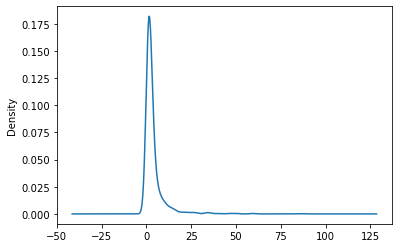

In [8]:
# Visualize the value counts of Winery

winery_type_counts.plot.density()

In [9]:
# Determine which values to replace if counts are less than ...?
replace_winery = list(winery_type_counts[winery_type_counts < 10].index)

# Replace in dataframe
for app in replace_winery:
    clean_df.Winery_x = clean_df.Winery_x.replace(app,"Other")
    
# Check to make sure binning was successful
clean_df.Winery_x.value_counts()

Other                                2617
Domaine Leflaive                       86
Louis Latour                           60
Domaine Zind Humbrecht                 59
Domaine William Fèvre                  50
                                     ... 
Domaines Schlumberger                  10
Bénédicte et Stéphane Tissot           10
Domaine des Héritiers Louis Jadot      10
Clos des Papes (Paul Avril)            10
Château de Meursault                   10
Name: Winery_x, Length: 100, dtype: int64

In [10]:
# Look at Wine Name value counts for binning

winename_type_counts = clean_df.WineName_x.value_counts()
winename_type_counts

Chardonnay                                       109
Corton-Charlemagne Grand Cru                      92
Puligny-Montrachet                                72
Meursault                                         56
Bâtard-Montrachet Grand Cru                       52
                                                ... 
White Label Nik Weis Wiltinger Alte Reben          1
Rias Baixas Albariño Finca Valiñas                 1
Meursault-Perrieres 1er Cru                        1
Talinay Coastal Limestone Vineyard Chardonnay      1
Chardonnay Sanford & Benedict Vineyard             1
Name: WineName_x, Length: 1938, dtype: int64

<AxesSubplot:ylabel='Density'>

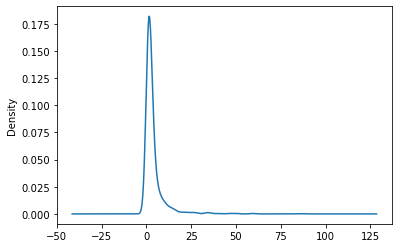

In [11]:
# Visualize the value counts of Winery

winery_type_counts.plot.density()

In [12]:
# Determine which values to replace if counts are less than ...?
replace_winename = list(winename_type_counts[winename_type_counts < 10].index)

# Replace in dataframe
for app in replace_winename:
    clean_df.WineName_x = clean_df.WineName_x.replace(app,"Other")
    
# Check to make sure binning was successful
clean_df.WineName_x.value_counts()

Other                                                                             3543
Chardonnay                                                                         109
Corton-Charlemagne Grand Cru                                                        92
Puligny-Montrachet                                                                  72
Meursault                                                                           56
Bâtard-Montrachet Grand Cru                                                         52
Pessac-Léognan Blanc (Grand Cru Classé de Graves)                                   43
Pessac-Léognan Blanc                                                                33
Châteauneuf-du-Pape Blanc                                                           29
Chassagne-Montrachet Blanc                                                          23
Meursault Blanc                                                                     23
Pouilly-Fuissé                             

In [13]:
# Review Categoricals

table_cat = clean_df.dtypes[clean_df.dtypes == "object"].index.tolist()
clean_df[table_cat].nunique()

FullName             4593
Winery_x              100
WineName_x             49
Year_x                 34
Region_x               31
RegionalVariety_x      31
dtype: int64

In [14]:
# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.get_dummies(clean_df[table_cat])

# Add the encoded variable names to the dataframe
# encode_df.columns = enc.get_feature_names(table_cat)
encode_df.head()

,FullName_A. Christmann Idig GG 2012,FullName_A. Christmann Idig GG 2014,FullName_A. Christmann Idig GG 2015,FullName_Abadal Nuat 2015,FullName_Abadia Retuerta Le Domaine Blanco de Guarda 2015,FullName_Abadia Retuerta Le Domaine Blanco de Guarda 2016,FullName_Abadia Retuerta Le Domaine Blanco de Guarda 2017,FullName_Abadia Retuerta Le Domaine Blanco de Guarda 2018,FullName_Abbatucci Diplomate d'Empire (Cuvée Collection Il Cavaliere) 2013,FullName_Abbatucci Diplomate d'Empire (Cuvée Collection Il Cavaliere) 2015,...,RegionalVariety_x_Saint-Péray,RegionalVariety_x_Sauvignon Blanc,RegionalVariety_x_Soave,RegionalVariety_x_Torrontes,RegionalVariety_x_Verdejo,RegionalVariety_x_Vin Jaune,RegionalVariety_x_Vinho Verde White,RegionalVariety_x_Viognier,RegionalVariety_x_White,RegionalVariety_x_White Blend
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
#Rebuild the table by adding nums with dummies
nn_df = pd.concat([num_df, encode_df], axis=1)

nn_df.head()

,FullName,VintageRating,VintageRatingCount,VintagePrice,WineRating,WineRatingCount,WinePrice,WineRatingPriceRatio,FullName_A. Christmann Idig GG 2012,FullName_A. Christmann Idig GG 2014,...,RegionalVariety_x_Saint-Péray,RegionalVariety_x_Sauvignon Blanc,RegionalVariety_x_Soave,RegionalVariety_x_Torrontes,RegionalVariety_x_Verdejo,RegionalVariety_x_Vin Jaune,RegionalVariety_x_Vinho Verde White,RegionalVariety_x_Viognier,RegionalVariety_x_White,RegionalVariety_x_White Blend
0,A. Christmann Idig GG 2012,4.3,106,83.95,4.3,869,83.95,0.051221,1,0,...,0,0,0,0,0,0,0,0,0,0
1,A. Christmann Idig GG 2014,4.1,95,77.95,4.3,869,77.95,0.055164,0,1,...,0,0,0,0,0,0,0,0,0,0
2,A. Christmann Idig GG 2015,4.3,105,57.55,4.3,869,57.55,0.074718,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Abadal Nuat 2015,4.1,29,31.99,3.9,253,31.99,0.121913,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Abadia Retuerta Le Domaine Blanco de Guarda 2015,4.1,149,29.00,4.2,1424,29.00,0.144828,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
# Remove name column
del nn_df['FullName']

In [17]:
# Create the features (X) and target (y) sets
X = nn_df.iloc[:, 0:4845].values
y = nn_df["VintageRating"].values

In [18]:
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [19]:
# Scale the data
from sklearn.preprocessing import StandardScaler

# Initialize and fit the scaler object
scaler = StandardScaler().fit(X_train)

# Scale train and test features
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
# Define the model - shallow neural net
number_input_features = 4845
number_hidden_nodes = 50

nn = Sequential()
# Hidden layer
nn.add(
    Dense(units=number_hidden_nodes, input_dim=number_input_features, activation="relu")
)
# Output layer
nn.add(Dense(units=1, activation="linear"))

In [21]:
# Compile the model
nn.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse"])

# Train the model
model_1 = nn.fit(X_train, y_train, validation_split=0.3, epochs=200)

Epoch 1/200
76/76 [==============================] - 1s 11ms/step - loss: 86.9502 - mse: 86.9502 - val_loss: 41.1287 - val_mse: 41.1287
Epoch 2/200
76/76 [==============================] - 0s 5ms/step - loss: 326.0365 - mse: 326.0365 - val_loss: 128.9297 - val_mse: 128.9297
Epoch 3/200
76/76 [==============================] - 0s 4ms/step - loss: 21.0451 - mse: 21.0451 - val_loss: 4.6121 - val_mse: 4.6121
Epoch 4/200
76/76 [==============================] - 0s 5ms/step - loss: 8.2414 - mse: 8.2414 - val_loss: 7.6488 - val_mse: 7.6488
Epoch 5/200
76/76 [==============================] - 0s 4ms/step - loss: 9.0150 - mse: 9.0150 - val_loss: 6.6022 - val_mse: 6.6022
Epoch 6/200
76/76 [==============================] - 0s 5ms/step - loss: 28.5250 - mse: 28.5250 - val_loss: 7.6082 - val_mse: 7.6082
Epoch 7/200
76/76 [==============================] - 0s 5ms/step - loss: 3.5810 - mse: 3.5810 - val_loss: 2.6774 - val_mse: 2.6774
Epoch 8/200
76/76 [==============================] - 0s 4ms/step -

76/76 [==============================] - 0s 5ms/step - loss: 31.5584 - mse: 31.5584 - val_loss: 3.1631 - val_mse: 3.1631
Epoch 63/200
76/76 [==============================] - 0s 4ms/step - loss: 1.8777 - mse: 1.8777 - val_loss: 0.2837 - val_mse: 0.2837
Epoch 64/200
76/76 [==============================] - 0s 4ms/step - loss: 0.7139 - mse: 0.7139 - val_loss: 0.1644 - val_mse: 0.1644
Epoch 65/200
76/76 [==============================] - 0s 4ms/step - loss: 0.1022 - mse: 0.1022 - val_loss: 0.1532 - val_mse: 0.1532
Epoch 66/200
76/76 [==============================] - 0s 5ms/step - loss: 0.1082 - mse: 0.1082 - val_loss: 0.1682 - val_mse: 0.1682
Epoch 67/200
76/76 [==============================] - 0s 5ms/step - loss: 0.1067 - mse: 0.1067 - val_loss: 0.6081 - val_mse: 0.6081
Epoch 68/200
76/76 [==============================] - 0s 4ms/step - loss: 0.7798 - mse: 0.7798 - val_loss: 0.2314 - val_mse: 0.2314
Epoch 69/200
76/76 [==============================] - 0s 4ms/step - loss: 0.1615 - mse:

76/76 [==============================] - 0s 5ms/step - loss: 0.8748 - mse: 0.8748 - val_loss: 0.3522 - val_mse: 0.3522
Epoch 124/200
76/76 [==============================] - 0s 5ms/step - loss: 2.8243 - mse: 2.8243 - val_loss: 0.3923 - val_mse: 0.3923
Epoch 125/200
76/76 [==============================] - 0s 5ms/step - loss: 0.6408 - mse: 0.6408 - val_loss: 3.4224 - val_mse: 3.4224
Epoch 126/200
76/76 [==============================] - 0s 5ms/step - loss: 0.8492 - mse: 0.8492 - val_loss: 0.1452 - val_mse: 0.1452
Epoch 127/200
76/76 [==============================] - 0s 4ms/step - loss: 0.0985 - mse: 0.0985 - val_loss: 0.1556 - val_mse: 0.1556
Epoch 128/200
76/76 [==============================] - 0s 4ms/step - loss: 0.1611 - mse: 0.1611 - val_loss: 0.3040 - val_mse: 0.3040
Epoch 129/200
76/76 [==============================] - 0s 5ms/step - loss: 0.4054 - mse: 0.4054 - val_loss: 0.1414 - val_mse: 0.1414
Epoch 130/200
76/76 [==============================] - 0s 4ms/step - loss: 0.0645 -

76/76 [==============================] - 0s 5ms/step - loss: 0.0678 - mse: 0.0678 - val_loss: 0.1415 - val_mse: 0.1415
Epoch 185/200
76/76 [==============================] - 0s 5ms/step - loss: 0.0945 - mse: 0.0945 - val_loss: 0.0786 - val_mse: 0.0786
Epoch 186/200
76/76 [==============================] - 0s 5ms/step - loss: 0.1299 - mse: 0.1299 - val_loss: 0.0928 - val_mse: 0.0928
Epoch 187/200
76/76 [==============================] - 0s 5ms/step - loss: 0.2075 - mse: 0.2075 - val_loss: 0.0829 - val_mse: 0.0829
Epoch 188/200
76/76 [==============================] - 0s 4ms/step - loss: 0.1080 - mse: 0.1080 - val_loss: 0.0690 - val_mse: 0.0690
Epoch 189/200
76/76 [==============================] - 0s 5ms/step - loss: 0.0521 - mse: 0.0521 - val_loss: 0.0727 - val_mse: 0.0727
Epoch 190/200
76/76 [==============================] - 0s 4ms/step - loss: 0.1989 - mse: 0.1989 - val_loss: 0.1540 - val_mse: 0.1540
Epoch 191/200
76/76 [==============================] - 0s 4ms/step - loss: 0.1986 -

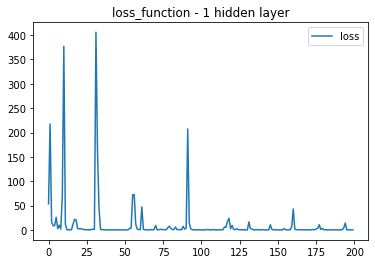

In [22]:
# Plot the train and test loss function
plt.plot(model_1.history["loss"])
plt.title("loss_function - 1 hidden layer")
plt.legend(["loss"])
plt.show()

In [23]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=0)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Loss: 24.960540771484375, Accuracy: 24.960540771484375


In [24]:
# Calculate the r squared score
predictions = nn.predict(X_test_scaled)
scale_nn_R2 = r2_score(y_test, predictions)
print("R Squared: ", scale_nn_R2)

R Squared:  -833.4178317083412


In [25]:
# Define the model - deep neural net
number_input_features = 4845
hidden_nodes_layer1 = 250
hidden_nodes_layer2 = 125

nn = Sequential()

# First hidden layer
nn.add(
    Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(Dense(units=1, activation="linear"))

In [26]:
nn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 250)               1211500   
_________________________________________________________________
dense_3 (Dense)              (None, 125)               31375     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 126       
Total params: 1,243,001
Trainable params: 1,243,001
Non-trainable params: 0
_________________________________________________________________


In [27]:
# Compile model
nn.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse"])

# Fit the model
model_2 = nn.fit(X, y, validation_split=0.3, epochs=200)

Epoch 1/200
101/101 [==============================] - 2s 13ms/step - loss: 656.0841 - mse: 656.0841 - val_loss: 130.3419 - val_mse: 130.3419
Epoch 2/200
101/101 [==============================] - 1s 11ms/step - loss: 150.7334 - mse: 150.7334 - val_loss: 2.2916 - val_mse: 2.2916
Epoch 3/200
101/101 [==============================] - 1s 11ms/step - loss: 6.2620 - mse: 6.2620 - val_loss: 1.0106 - val_mse: 1.0106
Epoch 4/200
101/101 [==============================] - 1s 11ms/step - loss: 10.6423 - mse: 10.6423 - val_loss: 3.5359 - val_mse: 3.5359
Epoch 5/200
101/101 [==============================] - 1s 12ms/step - loss: 26.0436 - mse: 26.0436 - val_loss: 2.3735 - val_mse: 2.3735
Epoch 6/200
101/101 [==============================] - 1s 11ms/step - loss: 116.3286 - mse: 116.3286 - val_loss: 21.6200 - val_mse: 21.6200
Epoch 7/200
101/101 [==============================] - 1s 11ms/step - loss: 14.5011 - mse: 14.5011 - val_loss: 0.6005 - val_mse: 0.6005
Epoch 8/200
101/101 [=================

101/101 [==============================] - 1s 11ms/step - loss: 0.8981 - mse: 0.8981 - val_loss: 0.0640 - val_mse: 0.0640
Epoch 62/200
101/101 [==============================] - 1s 10ms/step - loss: 0.0843 - mse: 0.0843 - val_loss: 0.1570 - val_mse: 0.1570
Epoch 63/200
101/101 [==============================] - 1s 10ms/step - loss: 0.0516 - mse: 0.0516 - val_loss: 0.0505 - val_mse: 0.0505
Epoch 64/200
101/101 [==============================] - 1s 10ms/step - loss: 0.0184 - mse: 0.0184 - val_loss: 0.0346 - val_mse: 0.0346
Epoch 65/200
101/101 [==============================] - 1s 10ms/step - loss: 0.0295 - mse: 0.0295 - val_loss: 0.0394 - val_mse: 0.0394
Epoch 66/200
101/101 [==============================] - 1s 11ms/step - loss: 0.0716 - mse: 0.0716 - val_loss: 0.0415 - val_mse: 0.0415
Epoch 67/200
101/101 [==============================] - 1s 10ms/step - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0318 - val_mse: 0.0318
Epoch 68/200
101/101 [==============================] - 1s 12ms/step

101/101 [==============================] - 1s 11ms/step - loss: 0.0055 - mse: 0.0055 - val_loss: 0.0158 - val_mse: 0.0158
Epoch 122/200
101/101 [==============================] - 1s 12ms/step - loss: 0.0050 - mse: 0.0050 - val_loss: 0.0176 - val_mse: 0.0176
Epoch 123/200
101/101 [==============================] - 1s 11ms/step - loss: 0.0062 - mse: 0.0062 - val_loss: 0.0176 - val_mse: 0.0176
Epoch 124/200
101/101 [==============================] - 1s 11ms/step - loss: 0.0156 - mse: 0.0156 - val_loss: 0.0163 - val_mse: 0.0163
Epoch 125/200
101/101 [==============================] - 1s 11ms/step - loss: 0.1825 - mse: 0.1825 - val_loss: 0.1808 - val_mse: 0.1808
Epoch 126/200
101/101 [==============================] - 1s 11ms/step - loss: 0.0690 - mse: 0.0690 - val_loss: 0.0212 - val_mse: 0.0212
Epoch 127/200
101/101 [==============================] - 1s 11ms/step - loss: 0.0344 - mse: 0.0344 - val_loss: 0.0184 - val_mse: 0.0184
Epoch 128/200
101/101 [==============================] - 1s 11

101/101 [==============================] - 1s 13ms/step - loss: 0.0054 - mse: 0.0054 - val_loss: 0.0199 - val_mse: 0.0199
Epoch 182/200
101/101 [==============================] - 1s 11ms/step - loss: 0.0066 - mse: 0.0066 - val_loss: 0.0156 - val_mse: 0.0156
Epoch 183/200
101/101 [==============================] - 1s 11ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 0.0153 - val_mse: 0.0153
Epoch 184/200
101/101 [==============================] - 1s 11ms/step - loss: 0.0064 - mse: 0.0064 - val_loss: 0.0254 - val_mse: 0.0254
Epoch 185/200
101/101 [==============================] - 1s 11ms/step - loss: 0.0832 - mse: 0.0832 - val_loss: 0.0222 - val_mse: 0.0222
Epoch 186/200
101/101 [==============================] - 1s 11ms/step - loss: 0.0162 - mse: 0.0162 - val_loss: 0.0213 - val_mse: 0.0213
Epoch 187/200
101/101 [==============================] - 1s 11ms/step - loss: 0.0286 - mse: 0.0286 - val_loss: 0.0271 - val_mse: 0.0271
Epoch 188/200
101/101 [==============================] - 1s 11

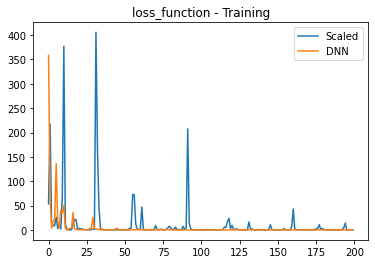

In [28]:
plt.plot(model_1.history["loss"])
plt.plot(model_2.history["loss"])
plt.title("loss_function - Training")
plt.legend(["Scaled", "DNN"])
plt.show()

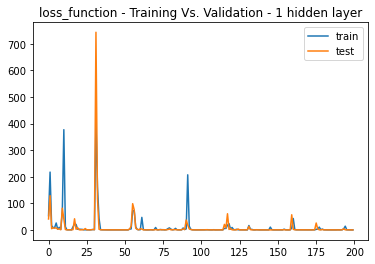

In [29]:
# Train vs test for shallow net
plt.plot(model_1.history["loss"])
plt.plot(model_1.history["val_loss"])
plt.title("loss_function - Training Vs. Validation - 1 hidden layer")
plt.legend(["train", "test"])
plt.show()

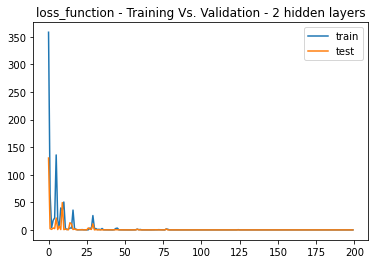

In [30]:
# Train vs test for deep net
plt.plot(model_2.history["loss"])
plt.plot(model_2.history["val_loss"])
plt.title("loss_function - Training Vs. Validation - 2 hidden layers")
plt.legend(["train", "test"])
plt.show()

In [31]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=0)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Loss: 1.4311764240264893, Accuracy: 1.4311764240264893


In [32]:
# Calculate the r squared score
predictions = nn.predict(X_test_scaled)
dnn_R2 = r2_score(y_test, predictions)
print("R Squared: ", dnn_R2)

R Squared:  -46.84348765651661


In [33]:
print("Scaled Neural Net R Squared:", scale_nn_R2)

print("Scaled Deep Neural Net R Squared:", dnn_R2)

Scaled Neural Net R Squared: -833.4178317083412
Scaled Deep Neural Net R Squared: -46.84348765651661
